<a href="https://colab.research.google.com/github/robertness/causal_ml_webinar/blob/master/AltdeepCausalBlitzSetup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Environmental preparation for the Altdeep Causal Machine Learning Blitz Webinar 

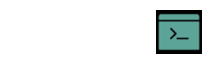

Follow the instructions below to setup the environment we'll use in the workshop.  If you are reading the pdf version of this document, the original Google Colab doc is [here](https://colab.research.google.com/drive/1SBZ2E8FzrObSNVuXngcUheCYyUjSEtQl?usp=sharing).

An other good way to prepare for the workshop is to go through our minicourse on [Causal Generative Machine Learning](https://altdeep.ai/p/causal-ml-minicourse).


## Setting up Pyro.

Pyro is the PyTorch-based probabilistic programming language we'll use for parameteric modeling.

First install [Pyro](https://pyro.ai/).

In [ ]:
!pip install torch torchvision torchaudio
!pip3 install pyro-ppl

Now we'll test Pyro with an example model from the docs.

In [2]:
import pyro

def weather():
    cloudy = pyro.sample('cloudy', pyro.distributions.Bernoulli(0.3))
    cloudy = 'cloudy' if cloudy.item() == 1.0 else 'sunny'
    mean_temp = {'cloudy': 55.0, 'sunny': 75.0}[cloudy]
    scale_temp = {'cloudy': 10.0, 'sunny': 15.0}[cloudy]
    temp = pyro.sample('temp', pyro.distributions.Normal(mean_temp, scale_temp))
    return cloudy, temp.item()

for _ in range(3):
    print(weather())

('sunny', 88.29259490966797)
('sunny', 71.17451477050781)
('cloudy', 50.392398834228516)


## Installing bnlearn

We'll also use the R package [bnlearn](https://www.bnlearn.com/).

You can [download R from the R website](https://www.r-project.org/).  [RStudio](https://rstudio.com/) is the preferred IDE.

 But you can also run R from within a Jupyter notebook using rpy2.  Follow the instructions below to install rpy2 and the requisite R packages.

In [3]:
!pip install rpy2
import rpy2
%load_ext rpy2.ipython

In [4]:
%%R
install.packages(c("bnlearn", "BiocManager"),  quiet=TRUE)
BiocManager::install('Rgraphviz', update=FALSE, ask=FALSE, quiet=TRUE)


We'll test out our R install by loading `bnlearn` and visualizing a simple directed graph.

R[write to console]: Loading required namespace: Rgraphviz



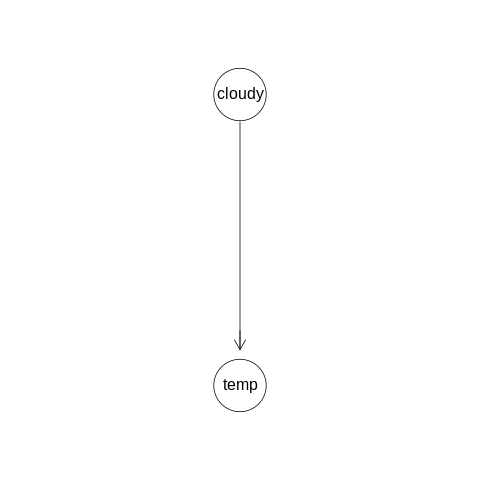

In [5]:
%%R
library(bnlearn)
net <- model2network("[cloudy][temp|cloudy]")
graphviz.plot(net)